# UNIX Commands for Data Scientists

In this reading we will go through the UNIX commands introduced in this week's video again so you can familiarize more with their syntax.

At any point feel free to modify the code and explore yourself the functionality of the UNIX shell.

## How to execute the commands

On **Windows** you need to open Git Bash and paste the command into the terminal, either using the mouse right click or right clicking on the top window border and select edit -> paste.

On **Mac OS** or **Linux** you can choose to either execute commands through this Jupyter Notebook or copy paste them into a terminal.

## Declare Filename

First we want to create a variable to hold the filename of the text file we want to analyze, so that if we want to change it later, we can change it only in this line.

This is the only case where the syntax is different in the Jupyter Notebook and running directly in the shell.

In the Notebook, each command is run on a separate shell process therefore we need to store `filename` in an enviromental variable, which is a way to set a persistent variable. This is performed using the `%env` IPython Magic function, execute `%env?` to learn more.

In [1]:
!ls ./unix

Icon?           shakespeare.txt


In [2]:
filename = './unix/shakespeare.txt'
!echo $filename
print(filename)

./unix/shakespeare.txt
./unix/shakespeare.txt


In [3]:
%env filename=./unix/shakespeare.txt

env: filename=./unix/shakespeare.txt


If you are instead running in a shell, you can just define a shell variable named filename with this syntax:

    filename=./unix/shakespeare.txt
    
Make sure that there are **no spaces** around the equal sign.

We can verify that the variable is now defined by printing it out with `echo`. For the rest of this reading we will use this variable to point to the filename.

In [4]:
!echo $filename

./unix/shakespeare.txt


## head

`head` prints some lines from the top of the file, you can specify how many with `-n`, what happens if you don't specify a number of lines?

In [6]:
!head -n 30 $filename

## tail

In [8]:
!tail -n 40 $filename

## wc

`wc`, which stands for wordcount, prints the number of lines, words and characters:

In [9]:
!wc $filename

  124505  901447 5583442 ./unix/shakespeare.txt


you can specify `-l` to only print the number of lines. Execute (in Git Bash on Windows or on Linux):

    wc --help
    
or (on Mac or on Linux):

    man wc
        
to find out how to print only words instead. Or guess!

In [10]:
!wc -l $filename

  124505 ./unix/shakespeare.txt


## cat

You can use pipes with `|` to stream the output of a command to the input of another, this is useful to compone many tools together to achieve a more complicated output.

For example `cat` dumps the content of a file, then we can pipe it to `wc`:

In [11]:
!cat $filename | wc -l 

  124505


## grep

`grep` is an extremely powerful tool to look for text in one or more files. For example in the next command we are looking for all the lines that contain a word, we also specify with `-i` that we are interested in case insensitive matching, i.e. don't care about case.

In [12]:
!grep -i 'parchment' $filename

  If the skin were parchment, and the blows you gave were ink,
  Ham. Is not parchment made of sheepskins?
    of the skin of an innocent lamb should be made parchment? That
    parchment, being scribbl'd o'er, should undo a man? Some say the
    Upon a parchment, and against this fire
    But here's a parchment with the seal of Caesar;  
    With inky blots and rotten parchment bonds;
    Nor brass, nor stone, nor parchment, bears not one,


We can combine `grep` and `wc` to count the number of lines in a file that contain a specific word: 

In [14]:
!grep -i 'liberty' $filename | wc -l

      72


In [16]:
!cat $filename | grep -o 'liberty' | wc -l

      71


## sed

`sed` is a powerful stream editor, it works similarly to `grep`, but it also modifies the output text, it uses regular expressions, which are a language to define pattern matching and replacement.

For example:

    s/from/to/g
    
means:

* `s` for substitution
* `from` is the word to match
* `to` is the replacement string
* `g` specifies to apply this to all occurrences on a line, not just the first

In the following we are replacing all instances of 'parchment' to 'manuscript'

Also we are redirecting the output to a file with `>`. Therefore the output instead of being printed to screen is saved in the text file `temp.txt`.

In [17]:
#replace all instances of 'parchment' to 'manuscript'

!sed -e 's/parchment/manuscript/g' $filename > temp.txt

Then we are checking with `grep` that `temp.txt` contains the word "manuscript":

In [18]:
!grep -i 'manuscript' temp.txt 

  If the skin were manuscript, and the blows you gave were ink,
  Ham. Is not manuscript made of sheepskins?
    of the skin of an innocent lamb should be made manuscript? That
    manuscript, being scribbl'd o'er, should undo a man? Some say the
    Upon a manuscript, and against this fire
    But here's a manuscript with the seal of Caesar;  
    With inky blots and rotten manuscript bonds;
    Nor brass, nor stone, nor manuscript, bears not one,


## sort

In [19]:
!head -n 5 $filename

We can sort in alphabetical order the first 5 lines in the file, see that we are just ordering by the first letter in each line:

In [20]:
!head -n 5 $filename | sort

We can specify that we would like to sort on the second word of each line, we specify that the delimiter is space with `-t' '` and then specify we want to sort on column 2 `-k2`.

Therefore we are sorting on "is, of, presented, releases"

In [21]:
# column seperated by ' ', sort on columnm 2, case insensitive -f
!head -n 5 $filename | sort -f -t' ' -k2

`sort` is often used in combination with `uniq` to remove duplicated lines.

`uniq -u` eliminates duplicated lines, but they need to be consecutive, therefore we first use `sort` to have equal lines consecutive and then we can filter them out easily with `uniq`:

In [22]:
!sort $filename | wc -l

  124505


In [24]:
# sort commandf or getting inuqe records using -u option
!sort $filename | uniq -u | wc -l

  110834


# Lets bring it all together

The "UNIX philosophy" is "Do one thing, do it well" (https://en.wikipedia.org/wiki/Unix_philosophy). The point is to have specialized tools with just 1 well defined function and then compose them together with pipes.

## Count the most frequent words

For example we want to find the 15 most frequent words with their count. We can achieve this combining the tools we learned in this reading.

First try it yourself, copy/paste this line many times run it piece by piece and try to understand what each step is doing, read documentation with `--help` or `man`, then will go through it together:

**Warning for MAC OS**: Mac OS has a different version of `sed` that has a special treatment of line feed `\n` and carriage return `\n`. Therefore on Mac we need to replace each occurrence of:

    sed -e 's/ /\n/g' -e 's/\r//g'

with:

    sed -e 's/ /\'$'\n/g' -e $'s/\r//g'

In [25]:
!sed -e 's/ /\'$'\n/g' -e 's/\r//g' $filename  | sed '/^$/d'| sort | uniq -c | sort -nr | head -15

22678 the
19163 I
17868 and
15324 to
15216 of

14554 you
12152 a
10614 my
9347 in
7662 is
7332 that
7146 he
7065 And
6737 not
sort: Broken pipe


**do not worry** about the Broken Pipe error, it is due to the fact that `head` is closing the pipe after the first 15 lines, and `sort` is complaining that it would have more text to write 

    !sed -e 's/ /\n/g' -e 's/\r//g' $filename
    
`sed` is making 2 replacements. The first replaces each space with `\n`, which is the symbol for a newline character, basically this is splitting all of the words in a text on separate lines. See yourself below!

The second replacement is more complicated, `shakespeare.txt` is using the Windows convention of using `\r\n` to indicate a new line. `\r` is carriage return, we want to get rid of it, so we are replacing it with nothing.

In [26]:
!sed -e 's/ /\'$'\n/g' -e 's/\r//g' < $filename | head

This
is
the
100th
Etext
file
pesented
by
Poject
Gutenbeg,
sed: stdout: Broken pipe


Next we are not interested in counting empty lines, so we can remove them with:

     sed '/^$/d'
     
* `^` indicates the beginning of a line
* `$` indicates the end of a line

Therefore `/^$/` matches empty lines. `/d` instructs `sed` to delete them.

Next we'd like to count the occurrence of each word, here we can use `uniq` with the `-c` option, but as with the `-u` option, it needs equal lines to be consecutive, so we do a sort first:

In [27]:
!sed -e 's/ /\'$'\n/g' -e 's/\r//g' $filename  | sed '/^$/d' | sort | uniq -c | head


 174 "

   1 "'Tis
   4 "A
   1 "AS-IS".
   1 "Ai,"
   1 "Alas,
   1 "Amen"



Good so we have counted the words, so we need to sort but we need to sort in numeric ordering instead of alphabetical so we specify `-n`, also we need reverse order `-r`, bigger first!

And finally we take the first 15 lines:

In [28]:
!sed -e 's/ /\'$'\n/g' -e 's/\r//g' $filename | sed '/^$/d' | sort | uniq -c | sort -nr | head -15

22678 the
19163 I
17868 and
15324 to
15216 of

14554 you
12152 a
10614 my
9347 in
7662 is
7332 that
7146 he
7065 And
6737 not
sort: Broken pipe


## Write the output to a file

We can also do the same and save the output to a file for later usage:

In [33]:
!sed -e 's/ /\'$'\n/g' -e 's/\r//g' < $filename | sed '/^$/d' | sort | sed '/^$/d' | uniq -c | sort -nr | head -15 > count_vs_words

sort: Broken pipe


In [30]:
!sed -e 's/ /\'$'\n/g' -e 's/\r//g' < $filename | sed '/^$/d' | sort | sed '/^$/d' | uniq -c | sort -nr | head -15 > count_vs_words

sort: Broken pipe


In [31]:
!cat count_vs_words

22678 the
19163 I
17868 and
15324 to
15216 of

14554 you
12152 a
10614 my
9347 in
7662 is
7332 that
7146 he
7065 And
6737 not


# Plot by importing word counts into Python

In [32]:
%matplotlib inline

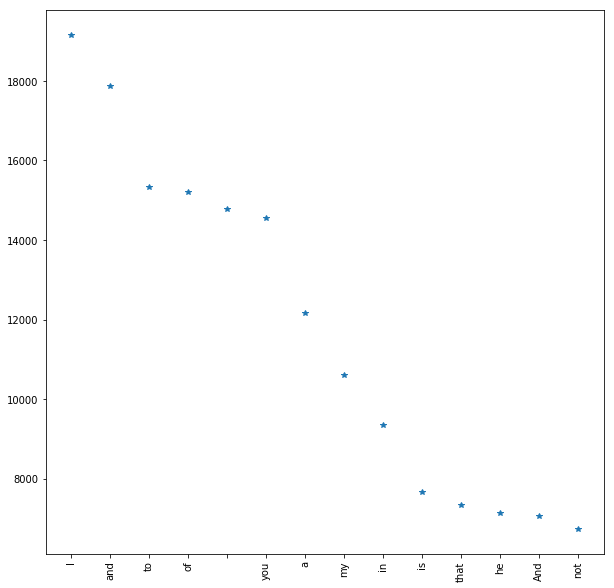

In [36]:
import matplotlib.pyplot as plt
import csv

xTicks = []
y = []

with open('count_vs_words','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))
        
# remove the count of spaces (first line)
y = y[1:]
xTicks = xTicks[1:]
#plot
x = range(len(y))
plt.figure(figsize=(10,10))
plt.xticks(x, xTicks, rotation=90) #xlabel with 90 degree angle
plt.plot(x,y,'*')
plt.show()